In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import plotly.offline as py
import plotly.express as px
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid-19-x-ray-10000-images/train_covid19.py
/kaggle/input/covid-19-x-ray-10000-images/covid19.model
/kaggle/input/covid-19-x-ray-10000-images/requirements.txt
/kaggle/input/covid-19-x-ray-10000-images/generate_images.py
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0266-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0253-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0265-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0243-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0217-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0223-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0227-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0235-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0218-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0216-0001.jpeg
/kaggle/input/c

In [2]:
data = '/kaggle/input/covid-19-x-ray-10000-images/dataset'

In [3]:
os.listdir(data)

['normal', 'covid']

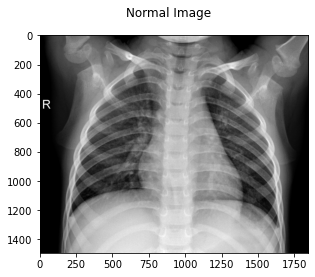

In [4]:
normal_images = []
for img_path in glob.glob(data + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('Normal Image')
plt.imshow(normal_images[0], cmap='gray')

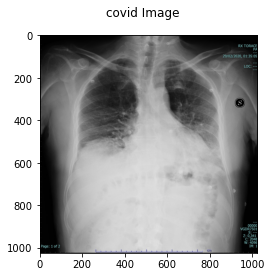

In [5]:
covid_images = []
for img_path in glob.glob(data + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid Image')
plt.imshow(covid_images[0], cmap='gray')

In [6]:
Image_Width = 150
Image_Height = 150
Cannels = 3

INPUT_SHAPE = (Image_Width, Image_Height, Cannels)
NB_CLASSES = 2
EPOCHS = 3
BATCH_SIZE = 6

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [8]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 250)       144250    
_________________________________________________________________
activation_2 (Activation)    (None, 70, 70, 250)       0

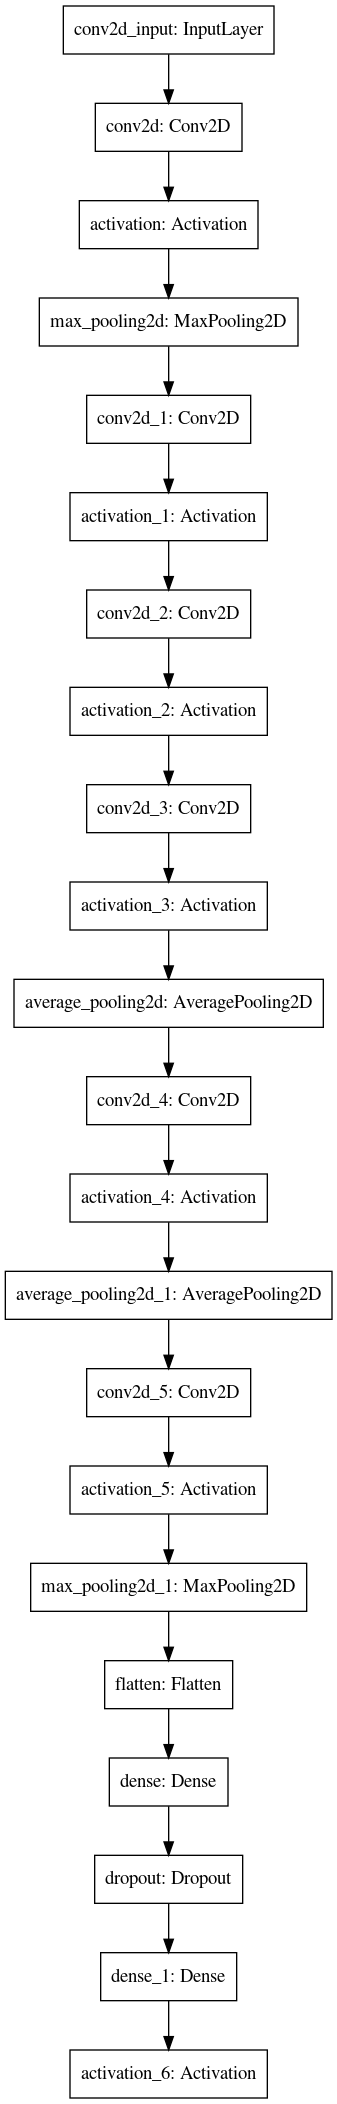

In [9]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png')

In [10]:

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data, 
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/3
12/12 [==============================] - 3s 266ms/step - loss: 1.2825 - accuracy: 0.6618 - val_loss: 0.6067 - val_accuracy: 0.7083
Epoch 2/3
12/12 [==============================] - 3s 221ms/step - loss: 0.6523 - accuracy: 0.7206 - val_loss: 0.6037 - val_accuracy: 0.7083
Epoch 3/3
12/12 [==============================] - 3s 246ms/step - loss: 0.8414 - accuracy: 0.7222 - val_loss: 0.6030 - val_accuracy: 0.7083


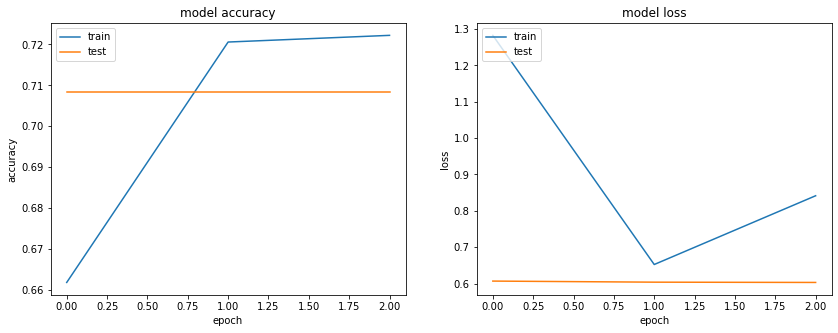

In [11]:
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.7222222089767456
validation_accuracy 0.7083333134651184


In [13]:
label = validation_generator.classes
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']


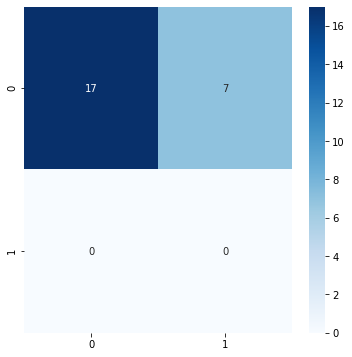

In [14]:
plt.figure(figsize = (6,6))
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(predicted_class_indices,label)
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , annot = True, fmt='')

In [15]:
correct = np.nonzero(predicted_class_indices == label)[0]
pred_class = predicted_class_indices.astype(int)

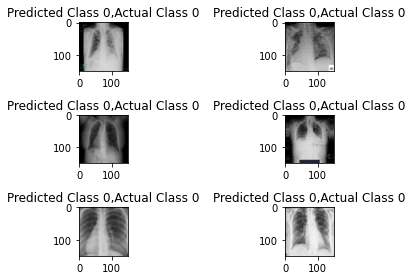

In [16]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(validation_generator[0][0][c].reshape(150,150,3))
    plt.title("Predicted Class {},Actual Class {}".format(pred_class.reshape(1,-1)[0][c], label[c]))
    plt.tight_layout()
    i += 1

In [17]:
#1convolutional layer model 
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

In [18]:
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               22429824  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 22,432,010
Trainable params: 22,432,010
Non-trainable params: 0
__________________________________________

In [20]:
EPOCHS = 10
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data, 
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/10
12/12 [==============================] - 4s 296ms/step - loss: 0.6162 - accuracy: 0.6912 - val_loss: 0.7041 - val_accuracy: 0.2917
Epoch 2/10
12/12 [==============================] - 3s 247ms/step - loss: 0.5960 - accuracy: 0.7083 - val_loss: 0.6095 - val_accuracy: 0.7083
Epoch 3/10
12/12 [==============================] - 3s 234ms/step - loss: 1.9346 - accuracy: 0.6912 - val_loss: 0.6130 - val_accuracy: 0.7083
Epoch 4/10
12/12 [==============================] - 3s 235ms/step - loss: 0.6308 - accuracy: 0.6912 - val_loss: 0.5779 - val_accuracy: 0.7083
Epoch 5/10
12/12 [==============================] - 3s 248ms/step - loss: 0.6582 - accuracy: 0.7059 - val_loss: 1.0066 - val_accuracy: 0.7083
Epoch 6/10
12/12 [==============================] - 3s 240ms/step - loss: 0.5302 - accuracy: 0.7917 - val_loss: 1.2700 - val_accuracy: 0.6667
Epoch 7/10
12/12 [==============================] - 3s 226ms/step - 

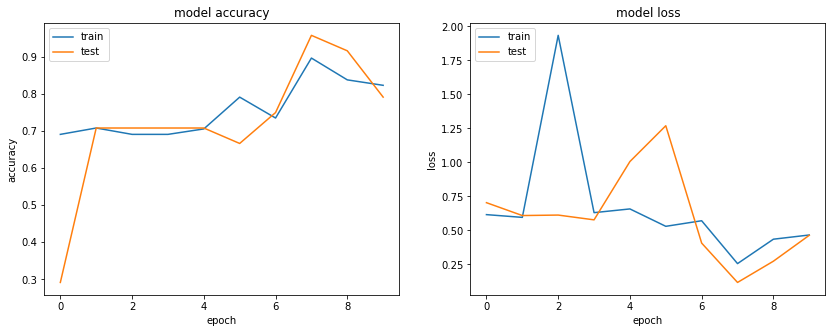

In [21]:
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.8235294222831726
validation_accuracy 0.7916666865348816


In [23]:
#3 convolutional layer model 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(10, activation='softmax'))

cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [24]:
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [25]:
cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)      

In [26]:
EPOCHS = 10
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data, 
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/10
12/12 [==============================] - 3s 278ms/step - loss: 0.4185 - accuracy: 0.8235 - val_loss: 0.7454 - val_accuracy: 0.7500
Epoch 2/10
12/12 [==============================] - 3s 225ms/step - loss: 0.4242 - accuracy: 0.9118 - val_loss: 0.0559 - val_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 3s 237ms/step - loss: 0.3750 - accuracy: 0.8676 - val_loss: 0.5441 - val_accuracy: 0.8333
Epoch 4/10
12/12 [==============================] - 3s 242ms/step - loss: 0.2566 - accuracy: 0.9028 - val_loss: 0.1790 - val_accuracy: 0.9167
Epoch 5/10
12/12 [==============================] - 3s 240ms/step - loss: 0.3744 - accuracy: 0.8472 - val_loss: 0.3335 - val_accuracy: 0.9583
Epoch 6/10
12/12 [==============================] - 3s 220ms/step - loss: 0.1298 - accuracy: 0.9265 - val_loss: 0.3576 - val_accuracy: 0.8750
Epoch 7/10
12/12 [==============================] - 3s 226ms/step - 

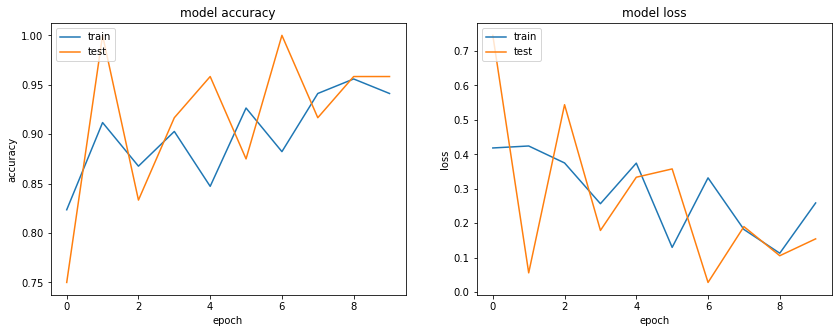

In [27]:
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9411764740943909
validation_accuracy 0.9583333134651184


In [29]:
#3 layer convolutional layer 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(10, activation='softmax'))

In [30]:
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [31]:
cnn3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)      

In [32]:
EPOCHS = 10
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data, 
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/10
12/12 [==============================] - 3s 266ms/step - loss: 0.1687 - accuracy: 0.9412 - val_loss: 0.1137 - val_accuracy: 0.9583
Epoch 2/10
12/12 [==============================] - 3s 224ms/step - loss: 0.0867 - accuracy: 0.9412 - val_loss: 0.0993 - val_accuracy: 0.9583
Epoch 3/10
12/12 [==============================] - 3s 230ms/step - loss: 0.1140 - accuracy: 0.9306 - val_loss: 0.1770 - val_accuracy: 0.9167
Epoch 4/10
12/12 [==============================] - 3s 248ms/step - loss: 1.4710 - accuracy: 0.9118 - val_loss: 0.1283 - val_accuracy: 0.9583
Epoch 5/10
12/12 [==============================] - 3s 217ms/step - loss: 0.0375 - accuracy: 0.9706 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 3s 222ms/step - loss: 0.0458 - accuracy: 0.9853 - val_loss: 0.2081 - val_accuracy: 0.9583
Epoch 7/10
12/12 [==============================] - 3s 221ms/step - 

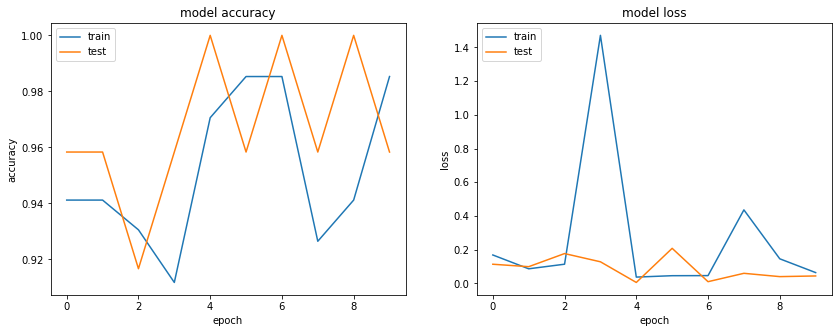

In [33]:
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9852941036224365
validation_accuracy 0.9583333134651184


4 convolutional layer model 

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(10, activation='softmax'))


In [36]:
cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [37]:
cnn4.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 71, 71, 64)       

In [38]:
EPOCHS = 10
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data, 
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/10
12/12 [==============================] - 3s 252ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.1547 - val_accuracy: 0.9583
Epoch 2/10
12/12 [==============================] - 3s 236ms/step - loss: 0.2171 - accuracy: 0.9412 - val_loss: 0.5006 - val_accuracy: 0.7500
Epoch 3/10
12/12 [==============================] - 3s 224ms/step - loss: 0.1817 - accuracy: 0.9722 - val_loss: 0.0325 - val_accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 3s 244ms/step - loss: 0.0494 - accuracy: 0.9853 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 3s 224ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.1960 - val_accuracy: 0.9583
Epoch 6/10
12/12 [==============================] - 3s 215ms/step - loss: 0.4398 - accuracy: 0.9118 - val_loss: 8.6820e-04 - val_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 3s 222ms/ste

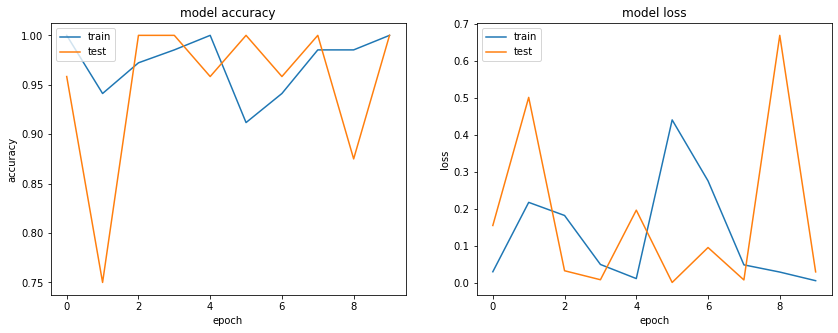

In [39]:
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 1.0
validation_accuracy 1.0
